# Project: Wrangling and Analyze Data

## Table Of Contents

> 1. [Data Gathering](#data_gathering)  
2. [Accessing Data](#accessing_data)  
    2.1 [Visually](#access_visually)  
    2.2 [Programmatically](#access_programmatically)  
3. [Addressing The Quality And Tidiness Issuess In Data](#address_issues)  
    3.1. [Quality](#address_quality)  
    3.2. [Tidiness](#address_tidiness)  
4. [Cleaning Data](#cleaning_data)    
    4.1. [Define](#clean_define)  
    4.2. [Code](#clean_code)  
    4.3. [Test](#clean_test)  
5. [Storing Data](#storing_data)  
6. [Analyzing and Visualizing Data](#analyzing_data)  
7. [References](#references)

> In this project we are going to wrangle and analyze data from [WeRateDogs](https://twitter.com/dog_rates) tweets, the goal of this project is to learn how to wrangle data in the most efficent way possible by using APIs instead of web scraping when possible then accessing and cleaning data.  
NOTE: unfortunatly I wasn't able to query the data required for this project using twitter API because the free plan doesn't provide the required permissions for tweets lookup it requires the basic plan which costs $100 per month so I had to download the provided data from udacity.

## Data Gathering <a id='data_gathering'></a>

> First we are going to import the required library's for this project:  
**numpy**: A library that executes code in low-level for better execution speed.  
**pandas**: To store the data in dataframes which are very fast and easy to manipulate.  
**requests**: To request files from the internet.  
**json**: To parse json string as dictonary.  
**matplotlib**: a versatile library for plotting data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests as rq
import json
import matplotlib.pyplot as plt

> Then we are going to request the required files for this project using requests library:

In [2]:
r1 = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r2 = rq.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')

> Then we are going to store them on the local machine:

In [3]:
image_predictions_tsv = open('datasets/image_predictions.tsv', 'w')
tweet_json = open('datasets/tweet-json.txt', 'r+')
image_predictions_tsv.write(r1.text)
tweet_json.write(r2.text)
tweet_json.seek(0) # Move to the first char in the file
image_predictions_tsv.close()

> Now we are going to loop each line inside `tweet_json` then parsing it into dictonary then storing each of the required variables into lists to append them to pandas dataframe.

In [4]:
tweet_ids = []
retweet_counts = []
favorite_counts = []

for line in tweet_json:
    json_object = json.loads(line)
    tweet_ids.append(json_object['id'])
    retweet_counts.append(json_object['retweet_count'])
    favorite_counts.append(json_object['favorite_count'])
tweet_json.close()

> Setup the required dataframes for this project:

In [5]:
df_twitter_archive = pd.read_csv('datasets/twitter-archive-enhanced.csv')
df_image_predictions = pd.read_csv('datasets/image_predictions.tsv', sep='\t')
df_tweets_dump = pd.DataFrame({'tweet_id': tweet_ids, 'retweet_count': retweet_counts, 'favorite_count': favorite_counts})

## Accessing Data <a id='accessing_data'></a>
> Now after wrangling the required data we are going to access the data visually and programmatically.

### Visually <a id='access_visually'></a>

In [6]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
df_tweets_dump

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatically <a id='access_programmatically'></a>

In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweets_dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isna()].shape[0]

59

In [13]:
df_twitter_archive[df_twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
df_twitter_archive[df_twitter_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [15]:
df_twitter_archive[(df_twitter_archive['doggo'] == 'None') & (df_twitter_archive['floofer'] == 'None') & (df_twitter_archive['pupper'] == 'None') & ((df_twitter_archive['puppo'] == 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
df_twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

## Addressing The Quality And Tidiness Issuess In Data <a id='address_issues'></a>

### Quality <a id='address_quality'></a>

* In `df_twitter_archive` some tweets `expanded_urls` are missing.
* In `df_twitter_archive` not all the tweets are about rating dogs so instead of making `rating_numerator` and `rating_denominator` NaN it include random numbers from the tweet.
* In `df_twitter_archive` some tweets doesn't include the dogs name.
* In `df_twitter_archive` some tweets doesn't add the correct name of the dog.
* In `df_twitter_archive` not all the tweets includes the stage of the dog
* In `df_twitter_archive` it includes a `source` column for the download link of twitter for iphone which doesn't serve any purpose.
* In `df_image_predictions` it is not required to predict all the images in tweet the includes multiple images because all the images represent the same dog.  
* In `df_twitter_archive` we can remove the tweets that are not about dogs ratings by using top 1 prediction from `df_image_predictions`.
* In `df_twitter_archive` Some dog names are not valid such as: 'a' 'such' 'the' 'just'.
* In `df_twitter_archive` Empty names are defined with 'None' instead of NaN.
* `df_image_predictions` we only need the top 1 prediction which is the most reliable prediction.  

### Tidiness <a id='address_tidiness'></a>

* `df_tweet_dump` data should be merged with `df_twitter_archive`.  
* `df_twitter_archive` includes retweets which is not required (we can check for retweets by gathering all the rows with `retweeted_status_id` or `retweeted_status_user_id` that is not equal to null).  
* We can add the dog breed to the tweet in the archive using the images predictions provided from udacity.
* `df_twitter_archive` includes replies which is not required (we can check for replies by gathering all the rows with `in_reply_to_status_id` or `in_reply_to_user_id` that is not equal to null).  
* Remove all the tweets in `df_twitter_archive` which is not included in `df_image_predictions` to avoid unreliable data.
* In `df_twitter_archive` uses 4 columns for each dog stage instead of using one column for the dog stage, (Some of the tweets includes multiple dogs which includes more than one stage so we will combine them with comma seperation).

> In total we have 11 quality issues and 6 tidiness issues that needs to be cleaned.

## Cleaning Data <a id='cleaning_data'></a>

### Define <a id='clean_define'></a>

> 1. We need to add all the missing `expanded_urls` to the tweets this is very simple by understanding the tweets links structure: https://twitter.com/username/status/tweet_id  
username: The username of the user who posted the tweet in this case `dog_rates`.  
tweet_id: The tweet ID which we can find in `df_twitter_archive`.  
2. we need to remove all the tweets which doesn't have a vaild rating by checking if the `rating_denominator` not equal to 10.  
3. Some tweets doesn't provide the dog name so the `name` is None but we don't have to do anything because we are not going to use it for this analysis.  
4. Most of the tweets with invalid dog names will be removed after removing all the tweets with invalid `rating_denominator`.
5. We can't do anything about the missing dog stage because some ratings doesn't specify the dog stage.  
6. We need to merge the 4 columns about the dog stages into one columns that is called `dog_stage`.  
7. We need to remove the `source` column which doesn't serve any purpose.  
8. In `df_image_predictions` there are some predictions that predict all the images in tweets that includes multiple ones but we only need the first image prediction as all the dog ratings images is about the same dog.
9. We will add the dogs breed to the tweets in the archive using the images predictions provided from udacity.
10. Remove all the tweets in `df_twitter_archive` which is not included in `df_image_predictions` to avoid unreliable data.
11. In `df_twitter_archive` we are going to remove the tweets that are not about dogs ratings by using top 1 prediction from `df_image_predictions`.  
12. We are going to merge `df_tweet_dump` with `df_twitter_archive` to improve tidiness.  
13. We are going to check for all the tweets with `retweeted_status_id` or `retweeted_status_user_id` that is not equal to null then remove them.  
14. Similar as 10 but we will check for `in_reply_to_status_id` or `in_reply_to_user_id` that is not equal to null then remove them.
15. In `df_twitter_archive` Some dog names are not valid such as: 'a' 'such' 'the' 'just' which will be removed by checking for lowercase names.
16. In `df_twitter_archive` Empty names are defined with 'None' will be replaced with NaN using `np.nan`.

### Code <a id='clean_code'></a>

> Before doing anything we are going to create a copy of all the datasets to clean them safely:

In [17]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_dump_clean = df_tweets_dump.copy()

> Now we will start the cleaning proccess by filling the empty urls:

In [18]:
def FillEmptyExpandedUrls(row):
    row['expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(row['tweet_id'])
    return row

df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].isna()] = df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].isna()].apply(FillEmptyExpandedUrls, axis=1)

> Then dropping rows with invalid rating denominator:

In [19]:
for index, row in df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator'] != 10].iterrows():
    df_twitter_archive_clean.drop(index, inplace=True)

> Then merging all 4 dogs 4 stages into one column:

In [20]:
df_twitter_archive_clean['dog_stage'] = np.nan
for index, row in df_twitter_archive_clean.iterrows():
    temp_array = []
    result = ''
    if row['doggo'] != 'None': temp_array.append('doggo')
    if row['floofer'] != 'None': temp_array.append('floofer')
    if row['pupper'] != 'None': temp_array.append('pupper')
    if row['puppo'] != 'None': temp_array.append('puppo')
    
    if len(temp_array) > 0:
        for i in range(len(temp_array)):
            if i < len(temp_array)-1:
                result += temp_array[i] + ', '
            else:
                result += temp_array[i]
        df_twitter_archive_clean.loc[index, 'dog_stage'] = result

df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

> Then Dropping the `source` column:

In [21]:
df_twitter_archive_clean.drop('source', axis=1, inplace=True)

> Then Dropping all the unnecessary columns from `df_image_predictions`:

In [22]:
predictions_ids = []
df_image_predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
for index, row in df_image_predictions_clean.iterrows():
    if row['img_num'] > 1:
        df_image_predictions_clean.drop(index, inplace=True)
    else:
        predictions_ids.append(row['tweet_id'])

> Then dropping all the rows with `twitter_id` that is not included in `df_image_predictions` and drops the tweets which is predected to not be about dogs then merging the results:

In [23]:
for index, row in df_twitter_archive_clean.iterrows():
    if row['tweet_id'] not in predictions_ids:
        df_twitter_archive_clean.drop(index, inplace=True)
    else:
        if df_image_predictions_clean[df_image_predictions_clean['tweet_id'] == row['tweet_id']]['p1_dog'].iloc[0] == False:
            df_twitter_archive_clean.drop(index, inplace=True)

df_image_predictions_clean.drop(['jpg_url', 'img_num', 'p1_conf', 'p1_dog'], axis=1, inplace=True)
df_twitter_archive_clean = df_twitter_archive_clean.merge(df_image_predictions_clean)

> Then merging the retweets and favorites count of each tweet with `df_twitter_archive`:

In [24]:
df_twitter_archive_clean = df_twitter_archive_clean.merge(df_tweets_dump_clean)

> Then Removing all the retweets and replies from `df_twitter_archive`:

In [25]:
for index, row in df_twitter_archive_clean[(df_twitter_archive_clean['in_reply_to_status_id'].notnull()) | (df_twitter_archive_clean['in_reply_to_user_id'].notnull())].iterrows():
    df_twitter_archive_clean.drop(index, inplace=True)
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [26]:
for index, row in df_twitter_archive_clean[(df_twitter_archive_clean['retweeted_status_id'].notnull()) | (df_twitter_archive_clean['retweeted_status_user_id'].notnull()) | (df_twitter_archive_clean['retweeted_status_timestamp'].notnull())].iterrows():
    df_twitter_archive_clean.drop(index, inplace=True)
df_twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

> Then get all dogs with invalid and `None` names and replace them with NaN.

In [27]:
mask = ((df_twitter_archive_clean['name'].str.islower()) | (df_twitter_archive_clean['name'] == 'None'))
df_twitter_archive_clean.loc[mask, 'name'] = np.nan

> Then finishing the cleaning process by resetting the rows indexes and renaming p1 to dog_prediction:

In [28]:
df_twitter_archive_clean = df_twitter_archive_clean.reset_index(drop=True)
df_twitter_archive_clean.rename(columns={'p1': 'dog_prediction'}, inplace=True)

### Test <a id='clean_test'></a>

In [29]:
df_twitter_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_prediction,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Chihuahua,4328,25461
2,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,Chesapeake_Bay_retriever,3261,20562
3,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,Appenzeller,2158,12041
4,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,Irish_terrier,4429,28226
...,...,...,...,...,...,...,...,...,...,...,...
1228,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,miniature_pinscher,41,111
1229,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,Rhodesian_ridgeback,147,311
1230,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,German_shepherd,47,128
1231,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,redbone,48,132


In [30]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1233 non-null   int64 
 1   timestamp           1233 non-null   object
 2   text                1233 non-null   object
 3   expanded_urls       1233 non-null   object
 4   rating_numerator    1233 non-null   int64 
 5   rating_denominator  1233 non-null   int64 
 6   name                888 non-null    object
 7   dog_stage           181 non-null    object
 8   dog_prediction      1233 non-null   object
 9   retweet_count       1233 non-null   int64 
 10  favorite_count      1233 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 106.1+ KB


## Storing Data <a id='storing_data'></a>

> Now we will store the cleaned data for future use:

In [31]:
df_twitter_archive_clean.to_csv('datasets/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data <a id='analyzing_data'></a>

> Now the goal in here is to produce at least 3 insight and 1 visualization from our cleaned data.  
> I found some interesting variables to explore in the dataframe like: `dog_stage` `dog_prediction` and ``favorite_count``.

> For our first insight lets find out what is the top 5 dogs with most favorites count.  
Some dog breeds doesn't have much ratings as the other dog breeds so I am going to divide each dog breeds favorite count with the number of raitings for the dog breed to get the average favorites per tweet:

In [32]:
df_dog_prediction_grouped = df_twitter_archive_clean.groupby(['dog_prediction'])
df_dog_breed_tweets_count = df_dog_prediction_grouped['tweet_id'].count()
df_dog_breed_total_favorites = df_dog_prediction_grouped['favorite_count'].sum()
df_average_like_per_tweet_breed = df_dog_breed_total_favorites / df_dog_breed_tweets_count
df_average_like_per_tweet_breed.astype(int).sort_values(ascending=False)

dog_prediction
Saluki                     24060
flat-coated_retriever      18589
Afghan_hound               17326
giant_schnauzer            17314
Irish_water_spaniel        16400
                           ...  
Japanese_spaniel            1362
komondor                    1114
Ibizan_hound                1114
Brabancon_griffon            830
black-and-tan_coonhound      113
Length: 108, dtype: int32

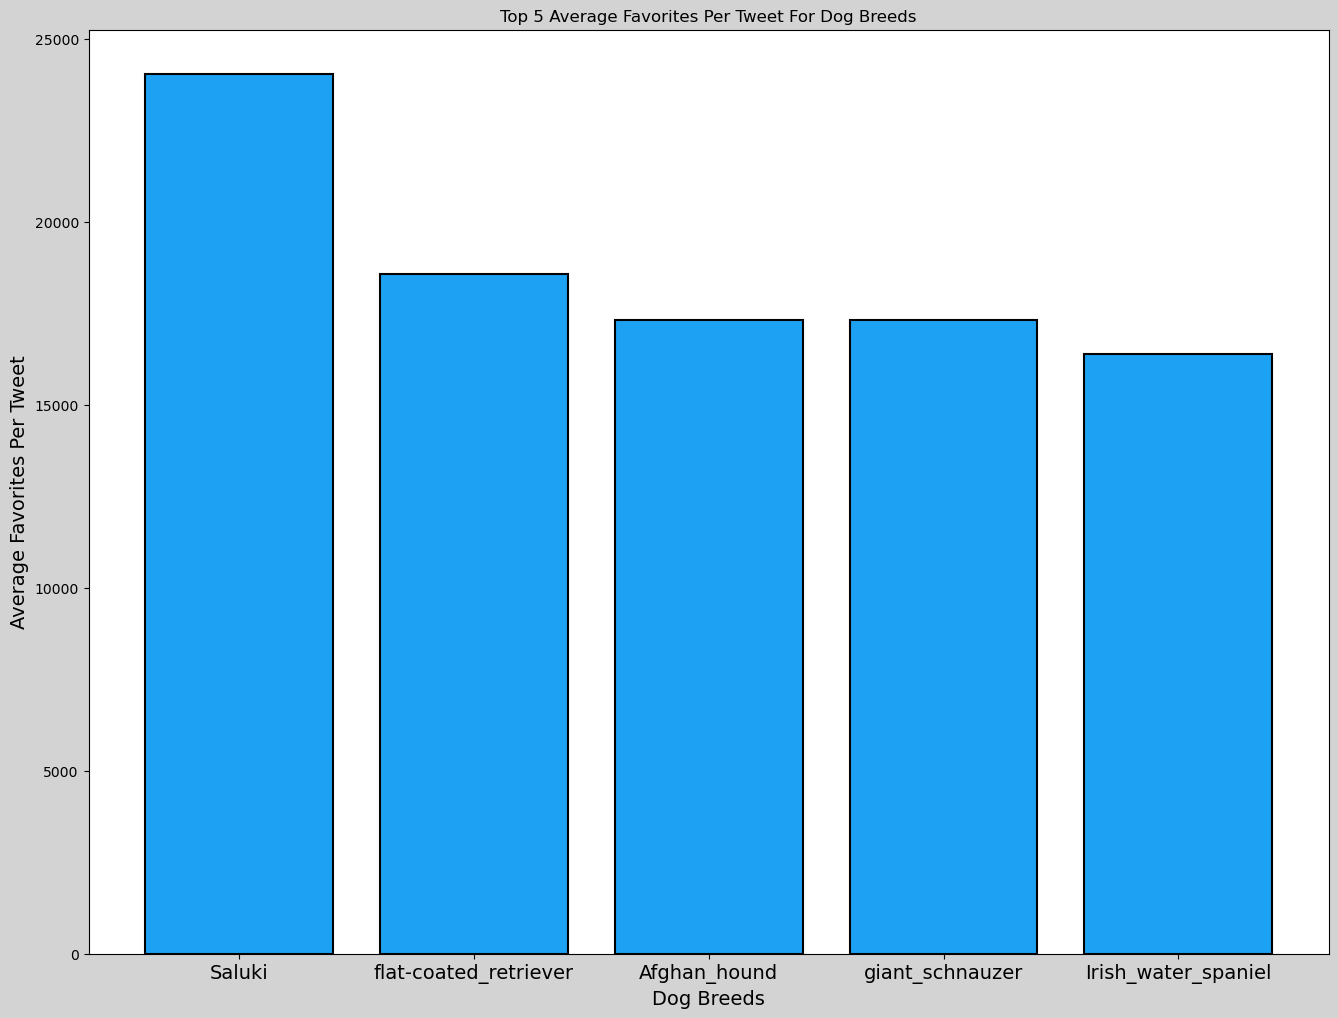

In [33]:
top_5_breed_favorites = df_average_like_per_tweet_breed.astype(int).sort_values(ascending=False).head(5)
plt.figure(figsize=(16, 12), facecolor='lightgray')
plt.title('Top 5 Average Favorites Per Tweet For Dog Breeds')
plt.bar(x=top_5_breed_favorites.index, height=top_5_breed_favorites.values, color='#1DA1F2', edgecolor='black', linewidth=1.5)
plt.xlabel('Dog Breeds', fontsize=14)
plt.ylabel('Average Favorites Per Tweet', fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('top_5_breed_favorites.png')

> We can see that the top 5 dogs with highest average favorites per tweet is:  
`Saluki`                     24060  
`flat-coated_retriever`      18589  
`Afghan_hound`               17326  
`giant_schnauzer`            17314  
`Irish_water_spaniel`        16400

> For our second insight we are going to view which dog stage has the highest average favorites per tweet.  
For that we are going to get all the tweets which includes a dog stage:

In [34]:
df_dog_stage_grouped =  df_twitter_archive_clean[df_twitter_archive_clean['dog_stage'] != 'None'].groupby(['dog_stage'])
df_dog_stage_tweets_count = df_dog_stage_grouped['tweet_id'].count()
df_dog_stage_total_favorites = df_dog_stage_grouped['favorite_count'].sum()
df_average_like_per_tweet_stage = df_dog_stage_total_favorites / df_dog_stage_tweets_count
df_average_like_per_tweet_stage.astype(int).sort_values(ascending=False)

dog_stage
doggo, puppo      47844
puppo             25979
doggo             21841
doggo, floofer    17169
doggo, pupper     15067
floofer           13331
pupper             6392
dtype: int32

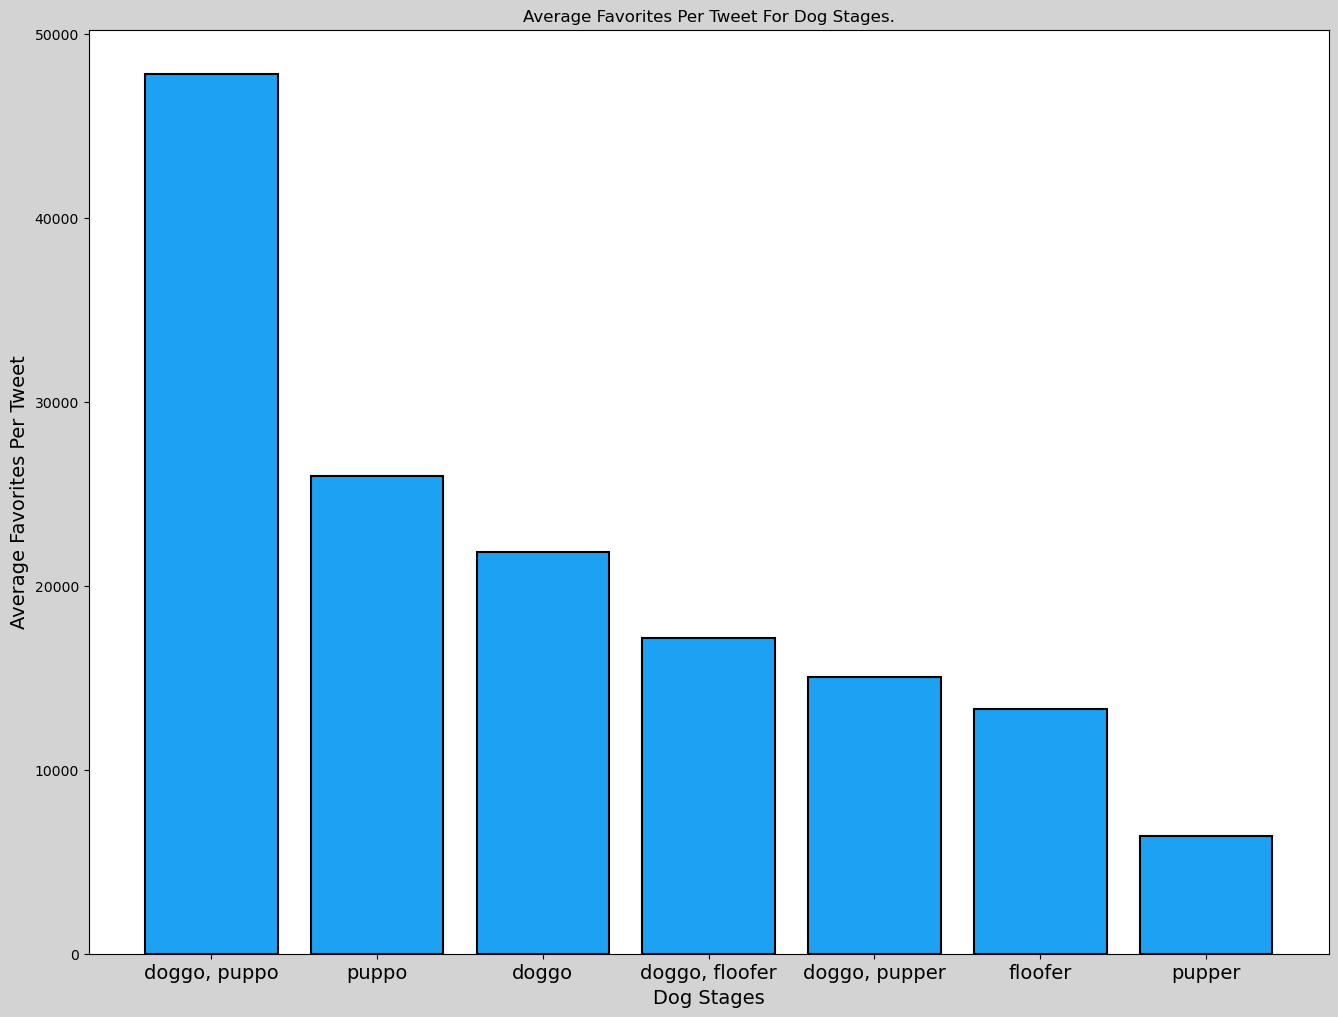

In [35]:
stage_favorites = df_average_like_per_tweet_stage.astype(int).sort_values(ascending=False)
plt.figure(figsize=(16, 12), facecolor='lightgray')
plt.title('Average Favorites Per Tweet For Dog Stages.')
plt.bar(x=stage_favorites.index, height=stage_favorites.values, color='#1DA1F2', edgecolor='black', linewidth=1.5)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Average Favorites Per Tweet', fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('stage_favorites.png')

> We can see that tweets with duggo and puppo dogs are have the highest average favorites per tweets with 47844.

> For our third and last insight we will check which dog names associated with the highest average favorites per tweet.

In [36]:
dog_names_grouped = df_twitter_archive_clean[df_twitter_archive_clean['name'] != 'None'].groupby('name')
dog_names_count = dog_names_grouped['tweet_id'].count()
dog_names_favorites_count = dog_names_grouped['favorite_count'].sum()
dog_names_grouped = dog_names_favorites_count / dog_names_count
top_dog_names_grouped = dog_names_grouped.astype(int).sort_values(ascending=False).head(5)

In [37]:
top_dog_names_grouped

name
Duddles    107956
Stephan    107015
Lilly       73397
Zoey        56618
Pipsy       49720
dtype: int32

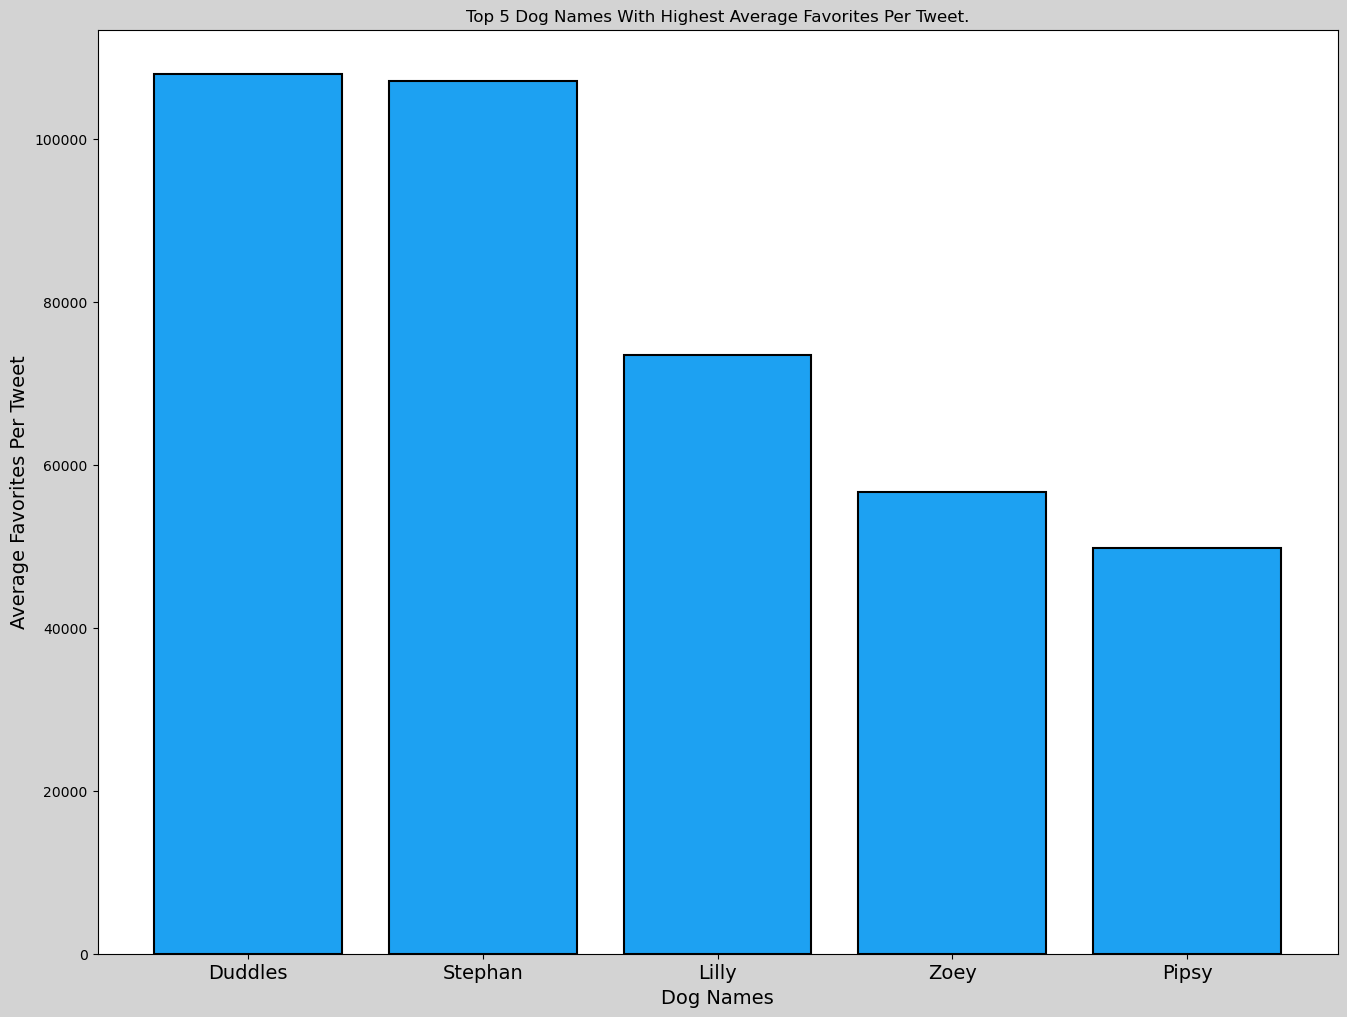

In [38]:
plt.figure(figsize=(16, 12), facecolor='lightgray')
plt.title('Top 5 Dog Names With Highest Average Favorites Per Tweet.')
plt.bar(x=top_dog_names_grouped.index, height=top_dog_names_grouped.values, color='#1DA1F2', edgecolor='black', linewidth=1.5)
plt.xlabel('Dog Names', fontsize=14)
plt.ylabel('Average Favorites Per Tweet', fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('top_names.png')

> We can see that the dog names with highest average favorites per tweet is:  
`Duddles`    107956  
`Stephan`    107015  
`Lilly`       73397  
`Zoey`        56618  
`Pipsy`       49720

## References <a id='references'></a>

> NumPy docs: https://numpy.org/doc/stable/index.html  
Pandas docs: https://pandas.pydata.org/docs/  
requests docs: https://requests.readthedocs.io/en/latest/  
json: https://docs.python.org/3/library/json.html  
matplotlib docs: https://matplotlib.org/stable/index.html